In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("/Users/casey/Documents/GitHub/AirFareCast/itineraries_snappy.parquet.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/casey/Documents/GitHub/AirFareCast/itineraries_snappy.parquet.csv'

In [20]:
df.head()

NameError: name 'df' is not defined

In [4]:
# Departure in datetime format
df['flightDate'] = pd.to_datetime(df['flightDate'])

In [5]:
# Stratified on departure date
df['strata'] = df['flightDate'].dt.to_period('M')

In [9]:
# 500,000 rows
fraction = 500000 / len(df)

sampled_df = df.groupby('strata', group_keys=False).apply(
    lambda x: x.sample(frac=fraction, random_state=42)
)

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_43278/303137903.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('strata', group_keys=False).apply(


In [10]:
print(f"Sample size: {len(sampled_df)}")

Sample size: 500001


In [29]:
sampled_df = pd.read_csv("/Users/casey/Documents/GitHub/AirFareCast/itineraries_sample_500.csv")

In [30]:
sampled_df.to_csv('itineraries_sample_500.csv', index=False)

In [32]:
sampled_df.describe()

,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance
count,500001.000000,500001.000000,500001.000000,500001.000000,463181.000000
mean,0.149500,292.216963,339.858633,5.986506,1607.902161
std,0.356609,182.479348,195.294301,2.874347,855.749282
min,0.000000,0.010000,19.590000,0.000000,89.000000
25%,0.000000,157.910000,196.600000,4.000000,876.000000
50%,0.000000,259.540000,304.350000,7.000000,1467.000000
75%,0.000000,397.200000,451.600000,9.000000,2412.000000
max,2.000000,6432.560000,6934.100000,10.000000,7252.000000


In [35]:
# Basic info
print("Dataset Info:")
sampled_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500001 entries, 0 to 500000
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   legId                              500001 non-null  object 
 1   searchDate                         500001 non-null  object 
 2   flightDate                         500001 non-null  object 
 3   startingAirport                    500001 non-null  object 
 4   destinationAirport                 500001 non-null  object 
 5   fareBasisCode                      500001 non-null  object 
 6   travelDuration                     500001 non-null  object 
 7   elapsedDays                        500001 non-null  int64  
 8   isBasicEconomy                     500001 non-null  bool   
 9   isRefundable                       500001 non-null  bool   
 10  isNonStop                          500001 non-null  bool   
 11  baseFare                 

In [36]:
# Summary statistics
print("\nSummary Statistics:")
print(sampled_df.describe(include='all'))


Summary Statistics:
                                   legId  searchDate  flightDate  \
count                             500001      500001      500001   
unique                            456172         171         217   
top     bf187712e9590dc4c68e1437686d15ff  2022-07-05  2022-08-30   
freq                                   6        4558        4421   
mean                                 NaN         NaN         NaN   
std                                  NaN         NaN         NaN   
min                                  NaN         NaN         NaN   
25%                                  NaN         NaN         NaN   
50%                                  NaN         NaN         NaN   
75%                                  NaN         NaN         NaN   
max                                  NaN         NaN         NaN   

       startingAirport destinationAirport fareBasisCode travelDuration  \
count           500001             500001        500001         500001   
unique        

In [37]:
# Checking for missing values
print("\nMissing Values:")
print(sampled_df.isnull().sum())


Missing Values:
legId                                    0
searchDate                               0
flightDate                               0
startingAirport                          0
destinationAirport                       0
fareBasisCode                            0
travelDuration                           0
elapsedDays                              0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
baseFare                                 0
totalFare                                0
seatsRemaining                           0
totalTravelDistance                  36820
segmentsDepartureTimeEpochSeconds        0
segmentsDepartureTimeRaw                 0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                  

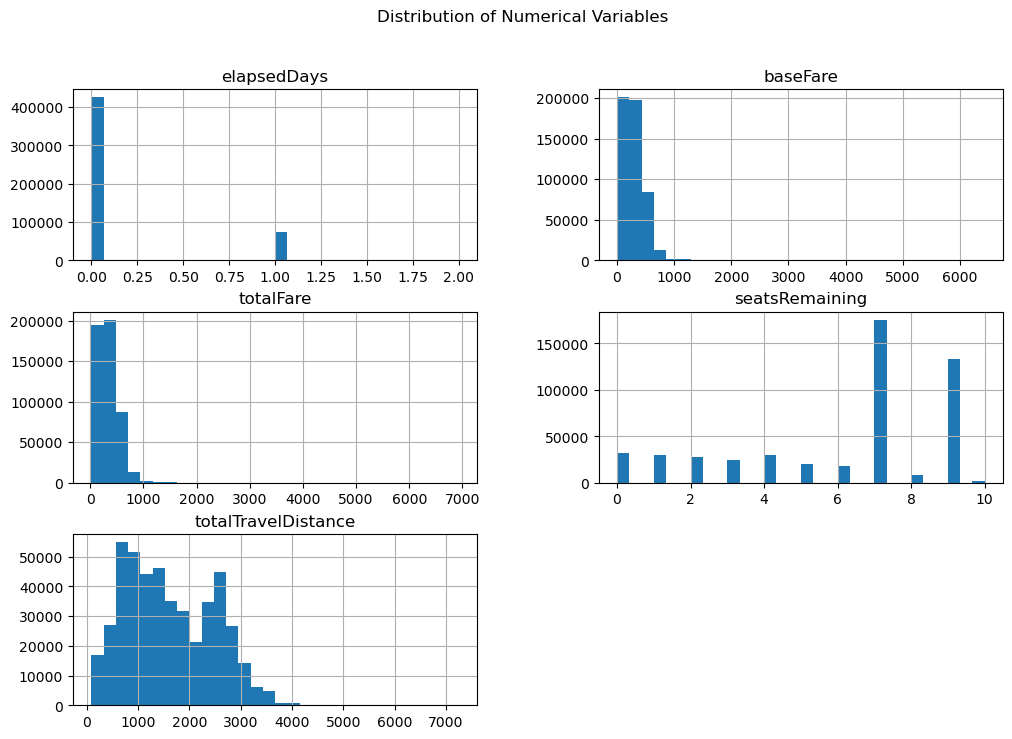

In [38]:
# Distribution of numerical variables
sampled_df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Variables")
plt.show()

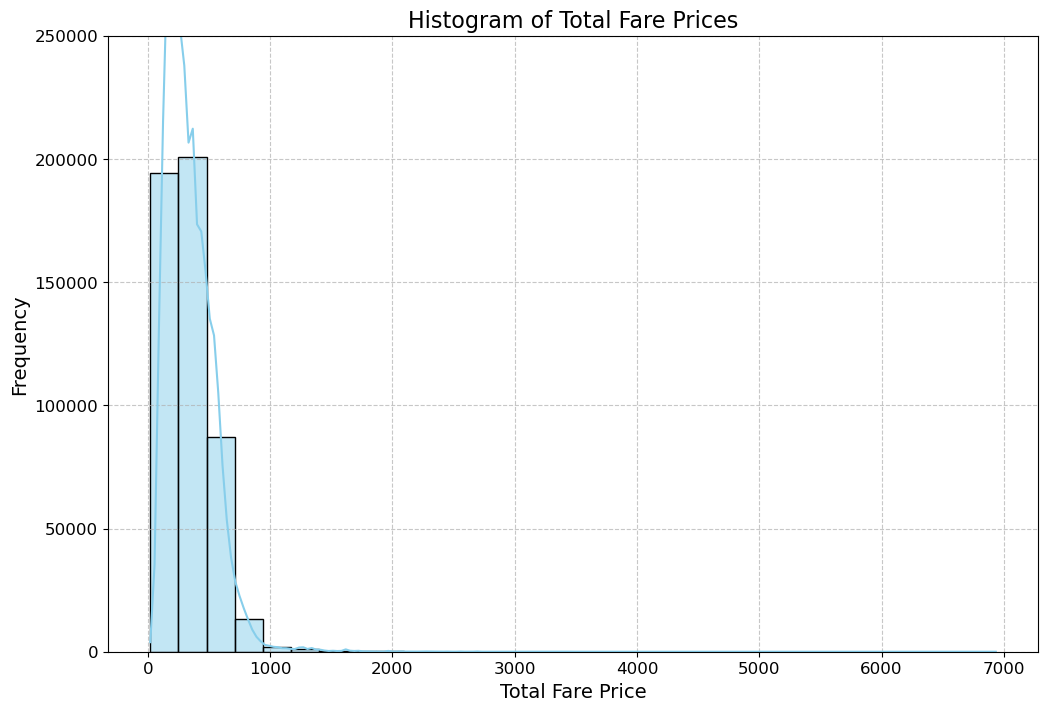

In [42]:
# Improved Histogram of Total Fare Prices
plt.figure(figsize=(12, 8))
sns.histplot(sampled_df['totalFare'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Fare Prices", fontsize=16)
plt.xlabel("Total Fare Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.ylim(0, 250000)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/3341408107.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y_tick // 60)}h {int(y_tick % 60)}m' for y_tick in y_ticks])


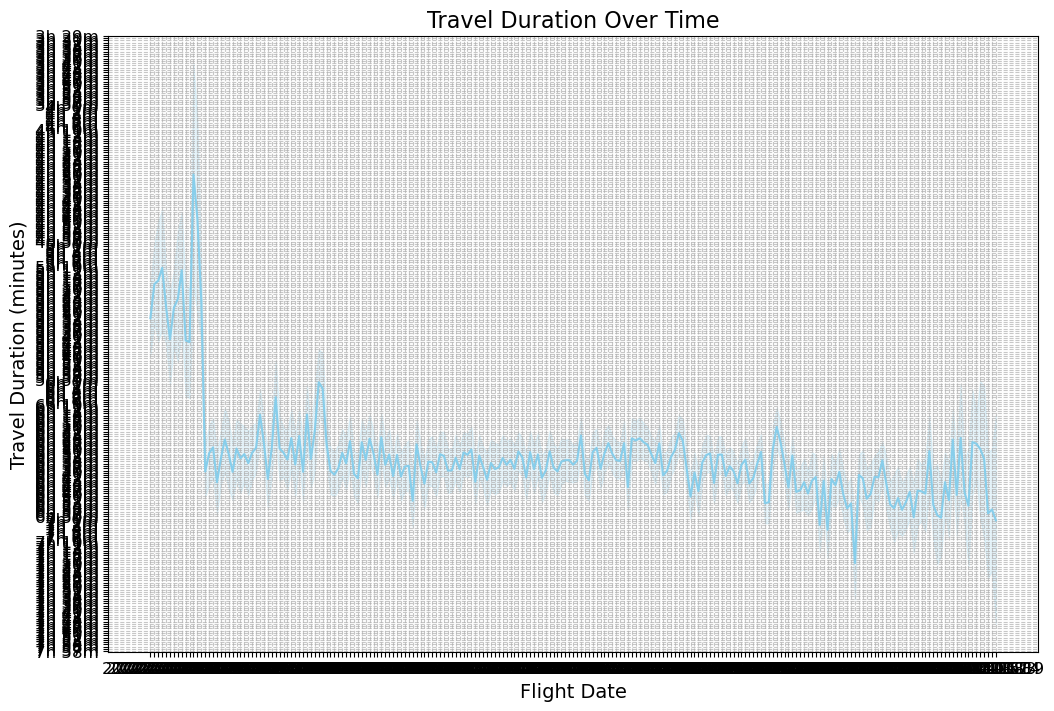

In [45]:
# Line raph of Travel Duration
plt.figure(figsize=(12, 8))
sns.lineplot(x='flightDate', y='travelDuration', data=sampled_df, color='skyblue')
plt.title("Travel Duration Over Time", fontsize=16)
plt.xlabel("Flight Date", fontsize=14)
plt.ylabel("Travel Duration (minutes)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve the y-axis by formatting the travel duration
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y_tick // 60)}h {int(y_tick % 60)}m' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/1032183343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seatsRemaining', data=sampled_df, palette='viridis')


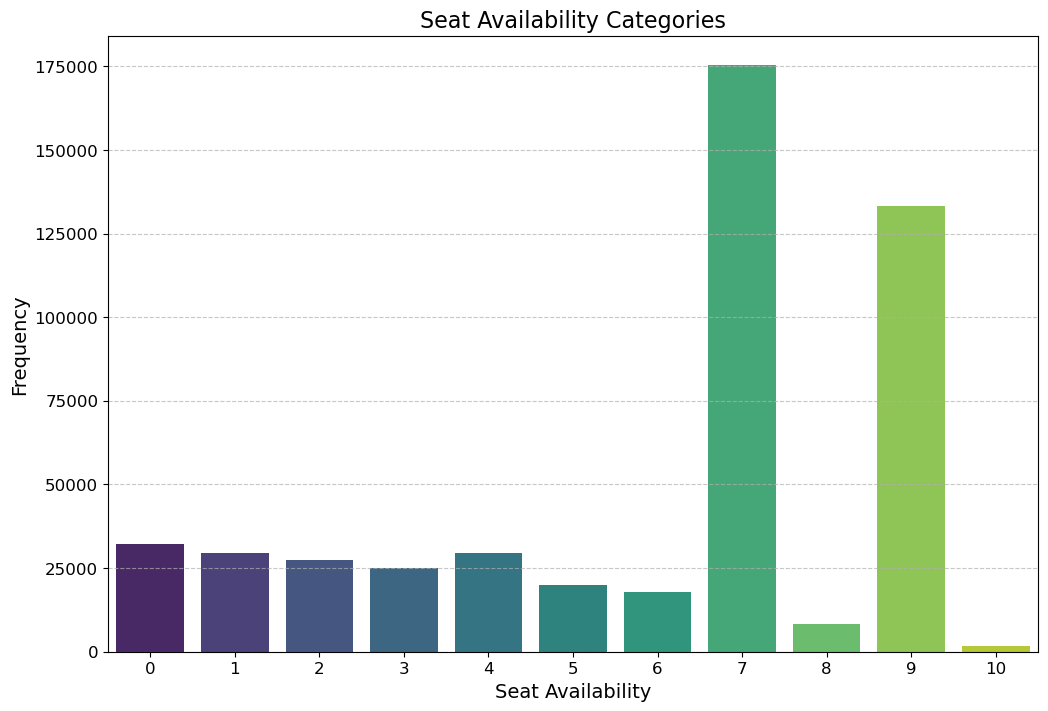

In [47]:
# Bar Chart of Seat Availability Categories
plt.figure(figsize=(12, 8))
sns.countplot(x='seatsRemaining', data=sampled_df, palette='viridis')
plt.title("Seat Availability Categories", fontsize=16)
plt.xlabel("Seat Availability", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/442144246.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


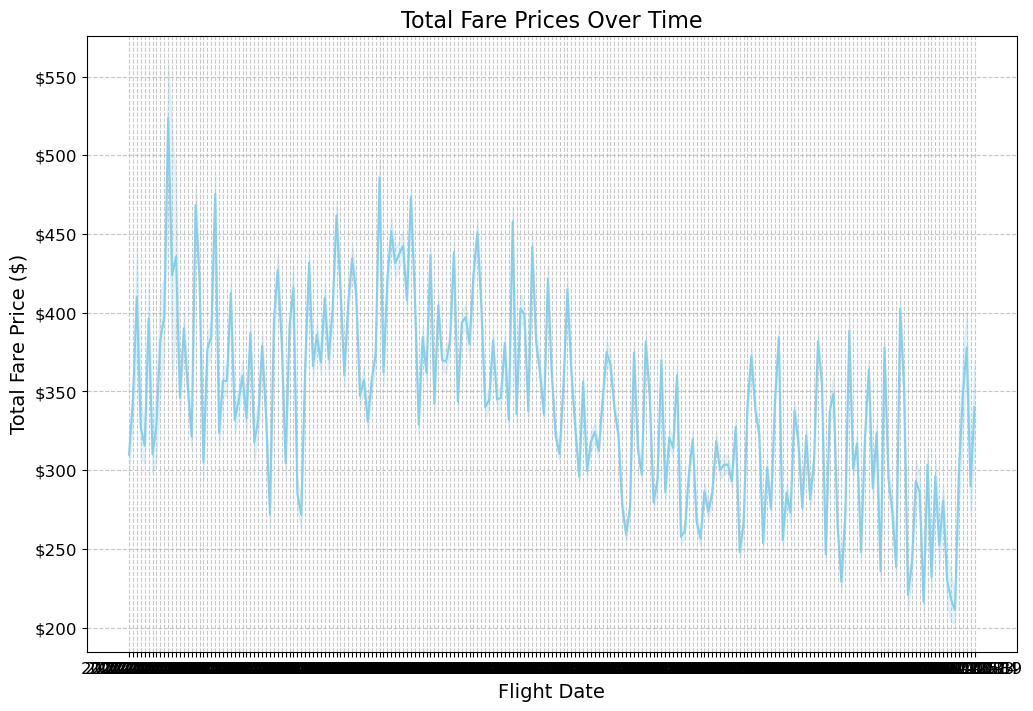

In [49]:
# Improved Line Plot of Fare Prices Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(x='flightDate', y='totalFare', data=sampled_df, color='skyblue')
plt.title("Total Fare Prices Over Time", fontsize=16)
plt.xlabel("Flight Date", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/3810480526.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayOfWeek', y='totalFare', data=sampled_df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/3810480526.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


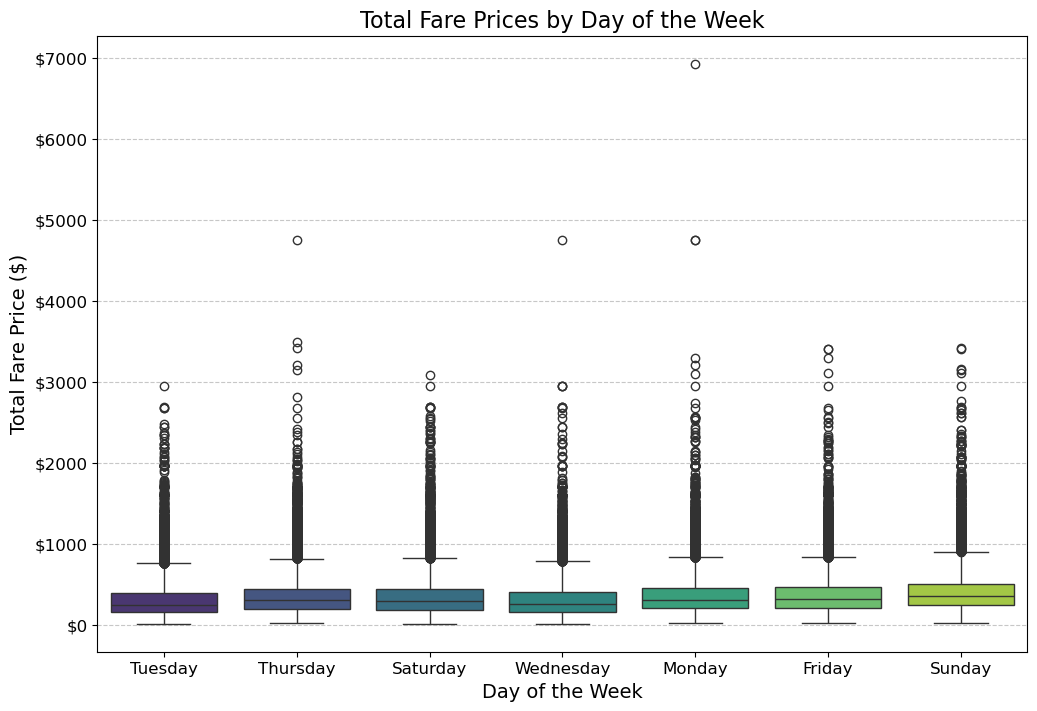

In [52]:
# Ensure 'flightDate' is in datetime format
sampled_df['flightDate'] = pd.to_datetime(sampled_df['flightDate'])

# Create a new column 'dayOfWeek' in the dataframe
sampled_df['dayOfWeek'] = sampled_df['flightDate'].dt.day_name()

# Boxplot of Prices by Day of the Week
plt.figure(figsize=(12, 8))
sns.boxplot(x='dayOfWeek', y='totalFare', data=sampled_df, palette='viridis')
plt.title("Total Fare Prices by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/463081511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segmentsAirlineName', y='totalFare', data=sampled_df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/463081511.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


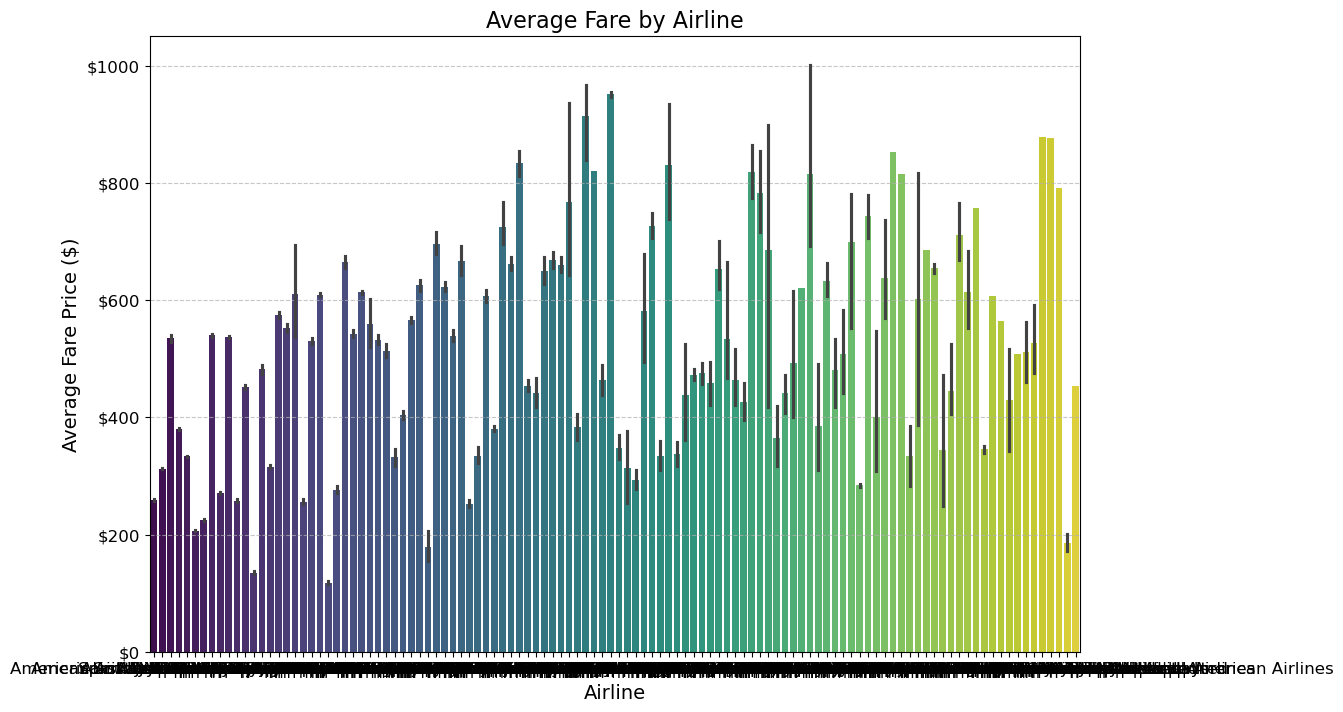

In [54]:
# Bar Chart of Airline vs. Average Fare
plt.figure(figsize=(12, 8))
sns.barplot(x='segmentsAirlineName', y='totalFare', data=sampled_df, palette='viridis')
plt.title("Average Fare by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Average Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/1998902150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segmentsCabinCode', y='totalFare', data=sampled_df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/1998902150.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


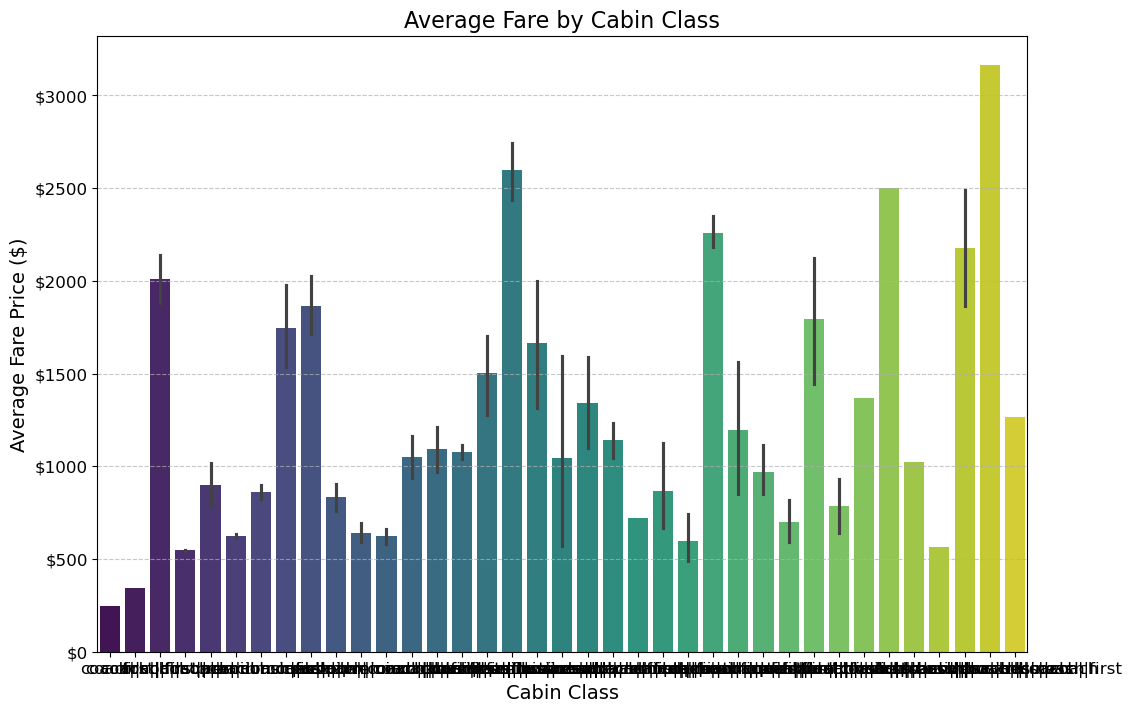

In [56]:
# Bar Chart of Cabin Class vs. Price
plt.figure(figsize=(12, 8))
sns.barplot(x='segmentsCabinCode', y='totalFare', data=sampled_df, palette='viridis')
plt.title("Average Fare by Cabin Class", fontsize=16)
plt.xlabel("Cabin Class", fontsize=14)
plt.ylabel("Average Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

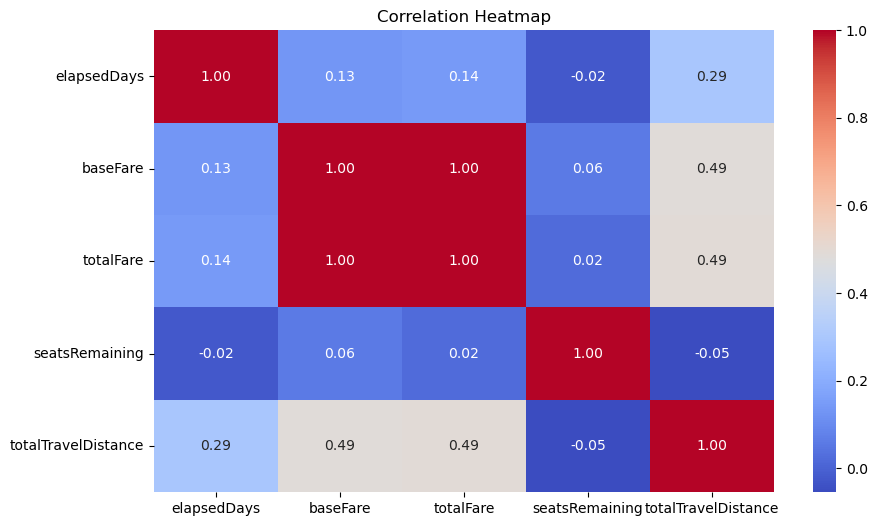

In [11]:
# Correlations
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

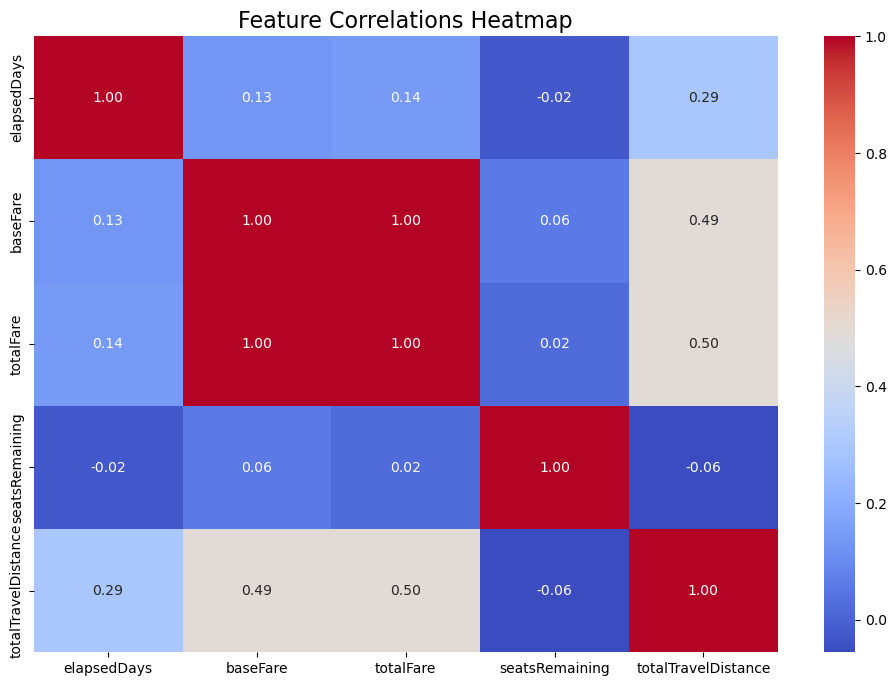

In [58]:
# Heatmap of Feature Correlations
plt.figure(figsize=(12, 8))
numeric_cols = sampled_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations Heatmap", fontsize=16)
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45225/2576625433.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


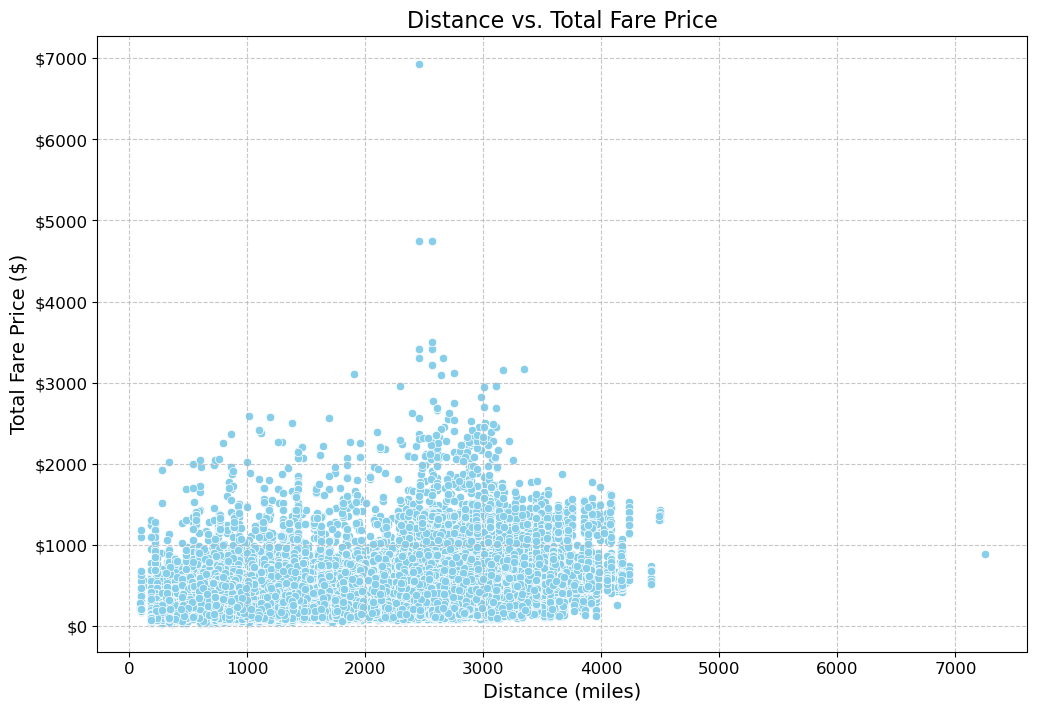

In [60]:
# Scatter Plot of Distance vs. Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='totalTravelDistance', y='totalFare', data=sampled_df, color='skyblue')
plt.title("Distance vs. Total Fare Price", fontsize=16)
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

In [ ]:
# Price Distribution by Time of Day
df['departure_hour'] = pd.to_datetime(df['segmentsDepartureTimeRaw'].str.split('||').str[0]).dt.hour
plt.subplot(3, 2, 1)
avg_price_by_hour = df.groupby('departure_hour')['totalFare'].mean().dropna()
sns.lineplot(x=avg_price_by_hour.index, y=avg_price_by_hour.values)
plt.title('Average Fare by Departure Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare ($)')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Fare ($)')

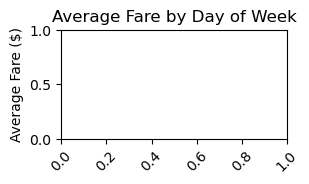

In [15]:
# Price Distribution by Day of Week
df['departure_day'] = df['segmentsDepartureTimeRaw'].str.split('||').apply(lambda x: pd.to_datetime(x[0]).day_name())
plt.subplot(3, 2, 2)
avg_price_by_day = df.groupby('departure_day')['totalFare'].mean()
sns.barplot(x=avg_price_by_day.index, y=avg_price_by_day.values)
plt.title('Average Fare by Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Average Fare ($)')
plt.show()

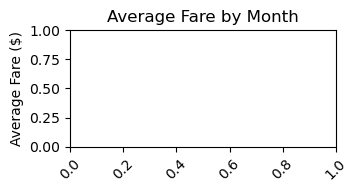

In [16]:
# Price Distribution by Month
df['departure_month'] = df['segmentsDepartureTimeRaw'].str.split('||').apply(lambda x: pd.to_datetime(x[0]).month_name())
plt.subplot(3, 2, 3)
avg_price_by_month = df.groupby('departure_month')['totalFare'].mean()
sns.barplot(x=avg_price_by_month.index, y=avg_price_by_month.values)
plt.title('Average Fare by Month')
plt.xticks(rotation=45)
plt.ylabel('Average Fare ($)')
plt.tight_layout()
plt.show()

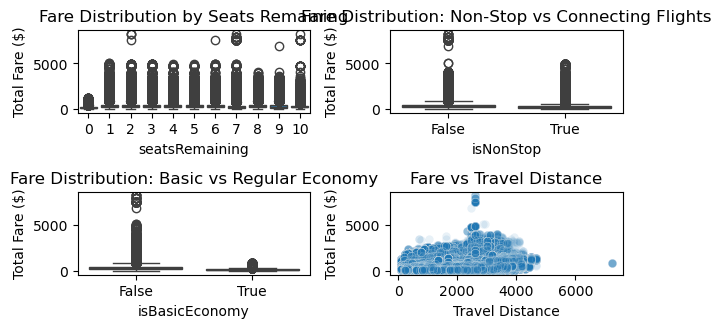

In [14]:
# Price vs Seats Remaining
plt.subplot(3, 2, 3)
sns.boxplot(x='seatsRemaining', y='totalFare', data=df)
plt.title('Fare Distribution by Seats Remaining')
plt.ylabel('Total Fare ($)')

# Non-Stop vs Connecting Flight Prices
plt.subplot(3, 2, 4)
sns.boxplot(x='isNonStop', y='totalFare', data=df)
plt.title('Fare Distribution: Non-Stop vs Connecting Flights')
plt.ylabel('Total Fare ($)')

# Basic Economy vs Regular Economy Prices
plt.subplot(3, 2, 5)
sns.boxplot(x='isBasicEconomy', y='totalFare', data=df)
plt.title('Fare Distribution: Basic vs Regular Economy')
plt.ylabel('Total Fare ($)')

# Price vs Distance
plt.subplot(3, 2, 6)
sns.scatterplot(x='totalTravelDistance', y='totalFare', data=df, alpha=0.1)
plt.title('Fare vs Travel Distance')
plt.xlabel('Travel Distance')
plt.ylabel('Total Fare ($)')

plt.tight_layout()
plt.show()

In [17]:
print("Detailed Price Analysis:")

# Price statistics by flight type
nonstop_stats = df[df['isNonStop']]['totalFare'].describe()
connecting_stats = df[~df['isNonStop']]['totalFare'].describe()

print("\nNon-Stop Flight Prices:")
print(nonstop_stats)
print("\nConnecting Flight Prices:")
print(connecting_stats)

# Price variation by number of seats remaining
print("\nAverage Prices by Seats Remaining:")
print(df.groupby('seatsRemaining')['totalFare'].mean().round(2))

# Price percentiles
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
price_percentiles = df['totalFare'].quantile(percentiles)
print("\nPrice Percentiles:")
for p, value in zip(percentiles, price_percentiles):
    print(f"{int(p*100)}th percentile: ${value:.2f}")

# Price variability metrics
print("\nPrice Variability Metrics:")
print(f"Standard Deviation: ${df['totalFare'].std():.2f}")
print(f"Coefficient of Variation: {(df['totalFare'].std() / df['totalFare'].mean() * 100):.1f}%")

# Markup analysis
df['markup_percentage'] = ((df['totalFare'] - df['baseFare']) / df['baseFare'] * 100)
print("\nMarkup Analysis:")
print(f"Average Markup: {df['markup_percentage'].mean():.1f}%")
print(f"Median Markup: {df['markup_percentage'].median():.1f}%")
print(f"Maximum Markup: {df['markup_percentage'].max():.1f}%")

Detailed Price Analysis:

Non-Stop Flight Prices:
count    2.206689e+07
mean     2.511486e+02
std      1.644708e+02
min      1.959000e+01
25%      1.486000e+02
50%      2.156000e+02
75%      3.136000e+02
max      4.923600e+03
Name: totalFare, dtype: float64

Connecting Flight Prices:
count    6.007186e+07
mean     3.731677e+02
std      1.964863e+02
min      3.208000e+01
25%      2.251000e+02
50%      3.486200e+02
75%      4.886000e+02
max      8.260610e+03
Name: totalFare, dtype: float64

Average Prices by Seats Remaining:
seatsRemaining
0     206.57
1     400.88
2     393.93
3     394.01
4     343.31
5     389.03
6     389.54
7     320.74
8     408.70
9     345.47
10    325.85
Name: totalFare, dtype: float64

Price Percentiles:
10th percentile: $133.60
25th percentile: $197.10
50th percentile: $305.20
75th percentile: $452.09
90th percentile: $578.60

Price Variability Metrics:
Standard Deviation: $196.03
Coefficient of Variation: 57.6%

Markup Analysis:
Average Markup: 38.6%
Median M

The dataset contains over 82 million flight itineraries, it contains 27 columns with various flight details including pricing, routes, airlines, and booking conditions.